In [4]:
#download the custom helper.py file
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2021-03-19 23:37:24--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2021-03-19 23:37:24 (56.0 MB/s) - ‘helper.py’ saved [2813/2813]



In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import custom_helper
import fc_model

In [6]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


Extracting /F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /F_MNIST_data/FashionMNIST/raw



Extracting /F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /F_MNIST_data/FashionMNIST/raw



Extracting /F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /F_MNIST_data/FashionMNIST/raw



Extracting /F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /F_MNIST_data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Displaying one of the images in the train set

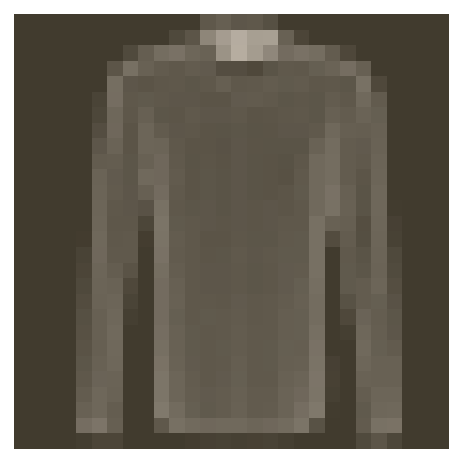

In [8]:
image, label = next(iter(trainloader))
custom_helper.imshow(image[0,:]);

# Train a network

In [9]:
# Create the network, define the criterion and optimizer

model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.758..  Test Loss: 1.003..  Test Accuracy: 0.597
Epoch: 1/2..  Training Loss: 1.025..  Test Loss: 0.780..  Test Accuracy: 0.709
Epoch: 1/2..  Training Loss: 0.879..  Test Loss: 0.659..  Test Accuracy: 0.746
Epoch: 1/2..  Training Loss: 0.800..  Test Loss: 0.634..  Test Accuracy: 0.746
Epoch: 1/2..  Training Loss: 0.742..  Test Loss: 0.600..  Test Accuracy: 0.776
Epoch: 1/2..  Training Loss: 0.688..  Test Loss: 0.595..  Test Accuracy: 0.773
Epoch: 1/2..  Training Loss: 0.711..  Test Loss: 0.575..  Test Accuracy: 0.782
Epoch: 1/2..  Training Loss: 0.678..  Test Loss: 0.557..  Test Accuracy: 0.786
Epoch: 1/2..  Training Loss: 0.623..  Test Loss: 0.541..  Test Accuracy: 0.802
Epoch: 1/2..  Training Loss: 0.618..  Test Loss: 0.561..  Test Accuracy: 0.784
Epoch: 1/2..  Training Loss: 0.625..  Test Loss: 0.546..  Test Accuracy: 0.798
Epoch: 1/2..  Training Loss: 0.667..  Test Loss: 0.537..  Test Accuracy: 0.797
Epoch: 1/2..  Training Loss: 0.619..  Test Loss: 0.5

# Saving and loading networks

# The weight and bias matrices for each of layers are stored in the "state_dict"

In [11]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


# Saving the "state_dict" to a "checkpoint.pth" file with "torch.save" 

In [12]:
torch.save(model.state_dict(), 'checkpoint.pth')

# Then we can load the "state_dict" with "torch.load"

In [13]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


# Loading the state dict in to the network

In [14]:
model.load_state_dict(state_dict)

<All keys matched successfully>

# Having a different architecture of a model and checkpoint will make loading the "state_dict" fail

In [15]:
# Try this
model = fc_model.Network(784, 10, [400, 200, 100])
# This will throw an error because the tensor sizes are wrong!
model.load_state_dict(state_dict)

RuntimeError: ignored

# BuildIing a dictionary with all the necessary information to compeletely rebuild the model

In [16]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [17]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [18]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
  )
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
